# KNN, Decision Tree, SVM, and Logistic Regression Classifiers to Predict Loan Status 

Today, we'll look into the question: will a new bank customer default on his or her loan? We'll optimize, train, make predictions with, and evaluate four classification models - K Nearest Neighbor (KNN), Decision Tree, Support Vector Machine (SVM), and logistic regression - for loan status of new customers.  We'll work with a bank data set of 346 customers with key variables such as loan status, principal, terms, effective date, due date, age, education, and gender. A bank's department head, for example, could apply a predictive model to better structure loans and tailor terms to various target customers. Let's break it down:

**Part 1**: Cleaning and wrangling, including converting data types, using .to_datetime, and replacing values
<br>**Part 2**: Exploratory analysis, including plotting stratified histograms, working with groupby, creating new relevant variables, and making observations to determine key features
<br>**Part 3**: One hot encoding to convert categorical variables with multiple categories to binary variables using pd.get_dummies and adding new features using pd.concat
<br>**Part 4**: Feature selection of predictors (X) and labeled target (y)
<br>**Part 5**: Normalizing feature set using scikit learn's preprocessing.StandardScaler.fit.transform
<br>**Part 6**: KNN, including determining and plotting optimal k value, training model and making predictions on test set,  generating a confusion matrix heatmap and report, evaluating jaccard and F1 scores 
<br>**Part 7**: Decision Tree, including determining and plotting optimal max depth, training model and making predictions on test set, visualizing decision tree using pydotplus and graphviz, generating a confusion matrix heatmap and report, evaluating jaccard and F1 scores
<br>**Part 8**: SVM, including determining and plotting optimal kernel function, training model and making predictions on test set, generating a confusion matrix heatmap and report, evaluating jaccard and F1 scores
<br>**Part 9**: Logistic Regression, including determining and plotting optimal regularization and numerical solver, training model and making predictions on test set, calculating probability, generating a confusion matrix heatmap and report, evaluating jaccard, F1, and log loss scores
<br>**Part 10**: Evaluating model performance head-to-head by creating a dataframe of accuracy scores for KNN, Decision Tree, SVM, and Logistic Regression models to make comparisons 

We'll cover cleaning, wrangling, and visualizing techniques, apply important scikit learn libraries to develop, optimize, train, and make predictions, and walk through evaluating and comparing models. Let's dig in.

In [1]:
# Import relevant libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns

# Scikit learn libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import scipy.optimize as opt
from sklearn.svm import SVC 
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# Visualizing Decision Tree
!pip install graphviz
!pip install pydotplus
import graphviz 
import pydotplus

     |████████████████████████████████| 286kB 7.4MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


## Part 1: Cleaning and Wrangling

In [2]:
# Read in data
pd.set_option("display.max_columns", 100)
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv')

In [3]:
# Check first few rows
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
# Check dimensions of dataframe
df.shape

(346, 10)

In [5]:
# Check number of null values. We see there are no null values
df.isnull().sum().to_frame()

,0
Unnamed: 0,0
Unnamed: 0.1,0
loan_status,0
Principal,0
terms,0
effective_date,0
due_date,0
age,0
education,0
Gender,0


In [6]:
# Check datatypes. Several key variables are objects, let's convert them to numerical values
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [7]:
# Convert gender strings 'Male' to 0 and 'Female' to 1
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,0
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,1
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,0
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,1
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,0


In [8]:
# Convert effective data and due date columns into date time object
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0


In [9]:
# Under column education, "Bachelor" is mispelled, let's replace it with the correct spelling
df['education']=df['education'].str.replace('Bechalor', 'Bachelor')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bachelor,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0


## Part 2: Exploratory Analysis

In [10]:
# As we'll be plotting with seaborn, let's set the style to darkgrid
sns.set_style("darkgrid")

In [11]:
# Check loan status split. We have 260 loans paied, and 86 that defaulted.
df['loan_status'].value_counts().to_frame()

,loan_status
PAIDOFF,260
COLLECTION,86


Let's check how loan status looks by gender. In our sample, from our plot, there are fewer women applying for and receiving loans (and thus fewer defaulting). Grouping our data by gender using groupby we see that 27% of men defaulted while 13% of women defaulted. 

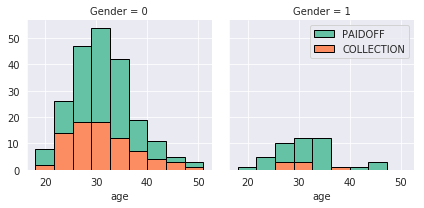

In [12]:
# Plot histogram of age stratified by gender and loan status
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [13]:
# Check percentage of loan status as collection by day of week 
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True).to_frame()

loan_status
Gender loan_status             
0      PAIDOFF         0.731293
       COLLECTION      0.268707
1      PAIDOFF         0.865385
       COLLECTION      0.134615

Let's see if loan status differs by education status. From our plot and grouped data below, it looks like there's not too much of a difference among different education categories, though people who are college-educated have a slightly lower default rate (24%) than those who have an education level of high school or below (26%). We also see that there are only 2 people who have an education level of master or above in our sample, let's exclude this group later when we build our feature set. 

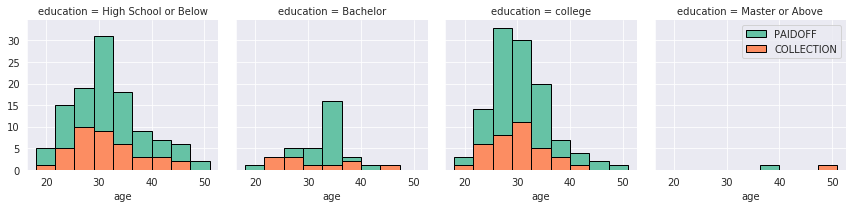

In [14]:
# Plot histogram of age stratified by education and loan status
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="education", hue="loan_status", palette="Set2", col_wrap=4)
g.map(plt.hist, 'age', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [15]:
# Check percentage of loan status as collection by day of week 
df.groupby(['education'])['loan_status'].value_counts(normalize=True).to_frame()

loan_status
education            loan_status             
Bachelor             PAIDOFF         0.750000
                     COLLECTION      0.250000
High School or Below PAIDOFF         0.741722
                     COLLECTION      0.258278
Master or Above      COLLECTION      0.500000
                     PAIDOFF         0.500000
college              PAIDOFF         0.765101
                     COLLECTION      0.234899

In [16]:
# We confirm that 'Master or Above' only has 2 observations, let's delete these observations when we do our feature selection
len(df[df.education=='Master or Above'])

2

Let's see if loan status differs by the day of the week of the loan. Below, we create a variable 'dayofweek' by applying the .dt.dayofweek function to our effective date variable. 

In our sample, from our plot, people receiving loans on Fridays, Saturdays, and Sundays are more likely to default than those doing so earlier in the week. If we group the data by day of week using groupby, we see that 45% and 39% of people receiving a loan on Saturday and Sunday, respectively, defaulted, while only 3% of people receiving a loan on Monday defaulted. 

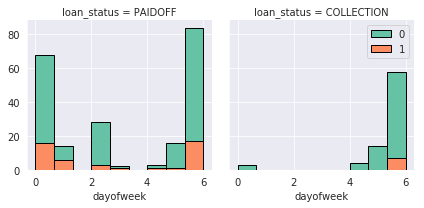

In [17]:
# Convert effective date to a day of the week using .dt.dayofweek
df['dayofweek'] = df['effective_date'].dt.dayofweek

# Plot histogram of day of week stratified by loan status and gender. 
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col = "loan_status", hue ="Gender", palette="Set2", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [18]:
# Check percentage of loan status as collection by day of week 
df.groupby(['dayofweek'])['loan_status'].value_counts(normalize=True).to_frame()

loan_status
dayofweek loan_status             
0         PAIDOFF         0.965517
          COLLECTION      0.034483
1         PAIDOFF         1.000000
2         PAIDOFF         1.000000
3         PAIDOFF         1.000000
4         COLLECTION      0.500000
          PAIDOFF         0.500000
5         PAIDOFF         0.548387
          COLLECTION      0.451613
6         PAIDOFF         0.608434
          COLLECTION      0.391566

As weekend loans seem to be a significant feature in our data set, let's create a variable 'weekend' for loans given on days 4, 5, and 6 (Friday, Saturday, and Sunday). 

In [19]:
# Create variable 'weekend' for any 'dayofweek' above 3
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bachelor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## Part 3: One Hot Encoding

For our feature set (predictors), let's select 'Principal', 'terms', 'age', 'Gender', 'weekend', and 'education'. Since our education variable is categorical with multiple categories, let's use one hot encoding to convert them to binary variables using pd.get_dummies and append them to our dataframe using pd.concat. As we saw before, let's drop education level 'Master or Above' as there were only two observations. 

In [20]:
# Create a numpy array for the features we'll be selecting. We use double brackets to create the numpy array, which is required for the scikit learn alogrithms later. 
features = df[['Principal','terms','age','Gender','weekend']]

# Apply pd.get_dummies for one hot encoding and add new features to array using pd.concat
features = pd.concat([features, pd.get_dummies(df['education'])], axis=1)
features.drop(['Master or Above'], axis = 1,inplace=True)
features[0:5]

,Principal,terms,age,Gender,weekend,Bachelor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


## Part 4: Feature Selection

Let's select our predictors, feature set X.

In [21]:
X = features
X[0:5]

,Principal,terms,age,Gender,weekend,Bachelor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


Let's select our labeled target as loan status, y.

In [22]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Part 5: Normalizing Feature Set

It's important to normalize our feature set to a zero mean and variance to prevent individual feature from being over or underweighted and in order to generate interpretable, reliable predictions. We can do this using the scikit learn libraries StandardScaler, fit, and transform. 

In [23]:
# Normalize using scikit learn preprocessing libraries StandardScaler, fit, transform. 
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

## Classification Models - Optimizing Algorithms, Train and Test Sets, and Evaluating Models

Let's build and compare 4 classification models: K Nearest Neighbor (KNN), Decision Tree, Support Vector Machine (SVM), and Logistic Regression. 

## Part 6: KNN

In [24]:
# Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print ('Training set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Training set: (276, 8) (276,)
Test set: (70, 8) (70,)


Let's determine our optimal value of K for the number of nearest neighbors. A K value that is too low will capture too much noise (overfit) while one that is too large will be over-generalized. Below, we determine our optimal K value is 7, which has a cross-validation accuracy of 0.74.

In [25]:
# Determine optimal k value. 
best_score = 0.0
acc_list=[]

for k in range(3,15):
    
    clf_knn = KNeighborsClassifier(n_neighbors = k, algorithm='auto')
    
    # using 10-fold cross validation for scoring the classifier's accuracy
    scores = cross_val_score(clf_knn, X, y, cv=10)
    score = scores.mean()
    acc_list.append(score)
    
    if score > best_score:
        best_score=score
        best_clf = clf_knn
        best_k = k
        
print("Best K is :",best_k,"| Cross validation Accuracy :",best_score)
clf_knn = best_clf

Best K is : 7 | Cross validation Accuracy : 0.7438655462184873


Let's plot accuracy across varying K values. We see our optimal K value, the one with the highest accuracy, is 7.

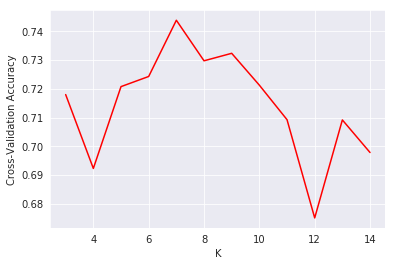

In [26]:
# Plot accuracy of various K values. 
plt.plot(range(3,15),acc_list, c="r")
plt.xlabel('K')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

In [27]:
# Train model using our algorithm above with optimal value of K of 7
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [28]:
# Make predictions on test set using our model
y_hat_knn = clf_knn.predict(X_test)
y_hat_knn[0:5]

array(['COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

#### Evaluating KNN Performance

Let's calculate the confusion matrix to evaluate model performance. 

In [29]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_hat_knn,labels=["PAIDOFF","COLLECTION"]) 
print(cm)

[[48  4]
 [13  5]]


We can plot a heatmap to make it easier to visualize and interpret:

Top left is true negative (TN)
<br>Top right is false positive (FP)
<br>Bottom left is false negative (FN)
<br>Bottom right is true postivie (TP)

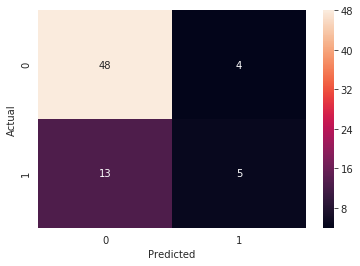

In [30]:
# Plot heatmap of confusion matrix
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Let's generate our confustion matrix report to evaluate model performance. Remember that:

Precision is the ratio of true postives to all positive predicted by model, Precision = TP / (TP + FP).

Recall is the ratio of true positives to all positives actually in our data set, Recall = TP / (TP + FN).

F1-score is the harmonic mean of preiciaion and recall. 

In [31]:
# Confusion matrix report
np.set_printoptions(precision=2)
print (classification_report(y_test, y_hat_knn))

              precision    recall  f1-score   support

  COLLECTION       0.56      0.28      0.37        18
     PAIDOFF       0.79      0.92      0.85        52

   micro avg       0.76      0.76      0.76        70
   macro avg       0.67      0.60      0.61        70
weighted avg       0.73      0.76      0.73        70



We can also calculate jaccard similarity score and f1-score automaically using the jaccard_similarity_score and f1_score functions, respectively. Jaccard score is the intersection divided by the union of the two labeled sets (the test and fitted set). F1-score is the harmonic mean of preiciaion and recall as we saw above. 

In [32]:
# Jaccard similarity score for KNN model for test set
jaccard_knn = jaccard_similarity_score(y_test, y_hat_knn)
jaccard_knn

0.7571428571428571

In [33]:
# F1 score for KNN model for test set
f1_knn = f1_score(y_test, y_hat_knn, average='weighted')
f1_knn

0.726337968815845

## Part 7: Decision Tree

Before we train and test our decision tree, let's determine our max depth that will yield the highest accuracy. When training our decision tree, we'll focus here on reducing entropy as much as possible (maximizing information gain) in each node of the tree. We see below that our max depth that will achieve the highest accuracy is 12. We see in our plot below that accuracy drops off after this point.

In [34]:
# Test max depths from 1 to 19
depth_range = range(1, 20)

# Create empty array for jaccard and f1 scores 
jaccard_similarity_score_ = []
f1_score_ = []

# Use for loop to train decision tree using increasing max depth values.  
# Make predictions using test set, append jaccard and F1 score to arrays created above
for d in depth_range:
    dec_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = d)
    dec_tree.fit(X_train, y_train)
    y_hat_tree = dec_tree.predict(X_test)
    jaccard_similarity_score_.append(jaccard_similarity_score(y_test, y_hat_tree))
    f1_score_.append(f1_score(y_test, y_hat_tree, average = 'weighted'))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
# Create dataframe with jaccard and F1 accuaracy values to determine best max depth. We see the best max depth is d = 12. 
result = pd.DataFrame([jaccard_similarity_score_, f1_score_], index = ['Jaccard', 'F1'], columns = ['d = 1','d = 2','d = 3','d = 4','d = 5','d = 6','d = 7','d = 8','d = 9','d = 10', 'd = 11', 'd = 12', 'd = 13', 'd = 14', 'd = 15', 'd = 16', 'd = 17', 'd = 18', 'd = 19'])
result.columns.name = 'Evaluation Metrics'
result

Evaluation Metrics,d = 1,d = 2,d = 3,d = 4,d = 5,d = 6,d = 7,d = 8,d = 9,d = 10,d = 11,d = 12,d = 13,d = 14,d = 15,d = 16,d = 17,d = 18,d = 19
Jaccard,0.742857,0.742857,0.742857,0.742857,0.742857,0.728571,0.742857,0.671429,0.742857,0.742857,0.714286,0.728571,0.685714,0.714286,0.714286,0.657143,0.714286,0.685714,0.671429
F1,0.633255,0.633255,0.633255,0.633255,0.657143,0.648739,0.657143,0.679186,0.704685,0.715306,0.657635,0.694142,0.671892,0.701720,0.708578,0.657143,0.708578,0.685714,0.674274


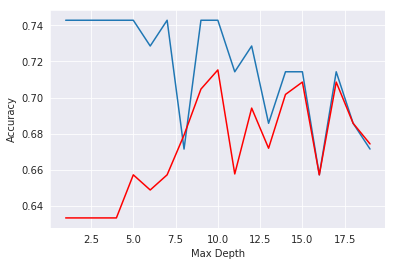

In [36]:
# Plot accuracy of various max depths, jaccard score in blue and F1 score in red. 
plt.plot(range(1,20),jaccard_similarity_score_)
plt.plot(range(1,20),f1_score_, c='r')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [37]:
# Set tree algorithm to max depth 12
dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 12)
dec_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
# Train decision tree
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
# Make prediction on test set using our model
y_hat_tree = dec_tree.predict(X_test)
y_hat_tree[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

Let's visualize our decision tree, which has a depth of 12 nodes. Keep in mind that values for our features are normalized. Our initial node is a criterion for weekend, which splits into criteria for a person's age and terms of loan. We can continue to follow the nodes and branches down, with each step maximizing reduction in entropy (maximizing information gain).  

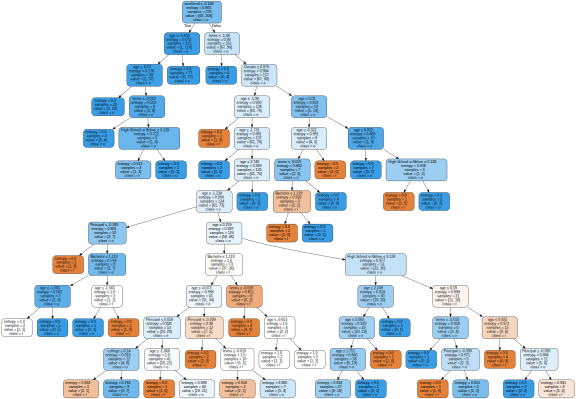

In [40]:
# Visualize decision tree using tree.export_graphviz
dot_data = tree.export_graphviz(dec_tree, out_file=None, 
                     feature_names=['Principal','terms','age','Gender','weekend','Bachelor','High School or Below','college'],  
                     class_names='loan_status',  
                     filled=True, rounded=True,  
                     special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"8,8!"') # We have 8 features in our feature set
gvz_graph = graphviz.Source(graph.to_string())

gvz_graph

#### Evaluating Decision Tree Performance

Let's calculate the confusion matrix to evaluate model performance.

In [41]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_hat_tree,labels=["PAIDOFF","COLLECTION"]) 
print(cm)

[[48  4]
 [14  4]]


We can plot a heatmap to make it easier to visualize and interpret:

Top left is true negative (TN)
<br>Top right is false positive (FP)
<br>Bottom left is false negative (FN)
<br>Bottom right is true postivie (TP)

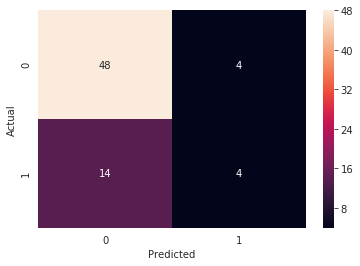

In [42]:
# Plot heatmap of confusion matrix
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Let's generate our confustion matrix report to evaluate model performance. Remember that:

Precision is the ratio of true postives to all positive predicted by model, Precision = TP / (TP + FP).

Recall is the ratio of true positives to all positives actually in our data set, Recall = TP / (TP + FN).

F1-score is the harmonic mean of preiciaion and recall. 

In [43]:
# Confusion matrix report
np.set_printoptions(precision=2)
print (classification_report(y_test, y_hat_tree))

              precision    recall  f1-score   support

  COLLECTION       0.50      0.22      0.31        18
     PAIDOFF       0.77      0.92      0.84        52

   micro avg       0.74      0.74      0.74        70
   macro avg       0.64      0.57      0.57        70
weighted avg       0.70      0.74      0.70        70



We can also calculate jaccard similarity score and f1-score automaically using the jaccard_similarity_score and f1_score functions, respectively. Jaccard score is the intersection divided by the union of the two labeled sets (the test and fitted set). F1-score is the harmonic mean of preiciaion and recall as we saw above.

In [44]:
# Jaccard similarity score for decision tree
jaccard_tree = jaccard_similarity_score(y_test, y_hat_tree)
jaccard_tree

0.7428571428571429

In [45]:
# F1 score for decision tree
f1_tree = f1_score(y_test, y_hat_tree, average='weighted')
f1_tree

0.7046847888953152

## Part 8: SVM

For our SVM, let's first determine which kernel function - linear, polynomial, radial basis function (rbf), or sigmoid - generates the highest accuracy. We see that all of the polynomial kernel function generates the highest F1 score of 0.69.   

In [46]:
# Determine optimal kernel function

# Array of kernel functions
kernel_func = ['sigmoid', 'poly', 'rbf', 'linear']

# Empty array for accuracy score (F1 score)
accuracy_score = []

# For each kernel function, train SVM model, run prediction on test set, calculate F1 score and append it to accuracy_score array
for k in kernel_func:
    svc_model = SVC(kernel = k) 
    svc_model.fit(X_train, y_train)
    y_hat_svm = svc_model.predict(X_test)
    accuracy_score.append(f1_score(y_test, y_hat_svm, average = 'weighted'))

accuracy_score

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packa

[0.6262101534828807,
 0.6857142857142858,
 0.6332552693208431,
 0.6332552693208431]

Text(0, 0.5, 'Accuracy')

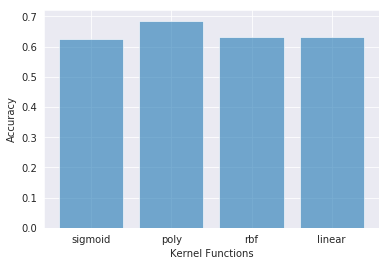

In [47]:
# Bar plot of accuracy score for each kernel function

y_pos = np.arange(len(kernel_func))
plt.bar(y_pos, accuracy_score, align='center', alpha = 0.6)
plt.xticks(y_pos, kernel_func)
plt.xlabel('Kernel Functions')
plt.ylabel('Accuracy')

In [48]:
# Set SVM algorithm with polynomial kernel function
svc_model = SVC(kernel = 'poly')

In [49]:
# Train SVM model 
svc_model.fit(X_train, y_train)
svc_model

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [50]:
# Make prediction on test set using our model
y_hat_svm = svc_model.predict(X_test)
y_hat_svm [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

#### Evaluating SVM Performance

Let's calculate the confusion matrix to evaluate model performance.

In [51]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_hat_svm,labels=["PAIDOFF","COLLECTION"]) 
print(cm)

[[51  1]
 [16  2]]


We can plot a heatmap to make it easier to visualize and interpret:

Top left is true negative (TN)
<br>Top right is false positive (FP)
<br>Bottom left is false negative (FN)
<br>Bottom right is true postivie (TP)

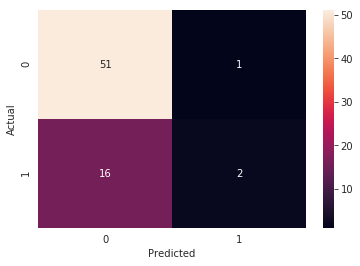

In [52]:
# Plot heatmap of confusion matrix
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Let's generate our confustion matrix report to evaluate model performance. Remember that:

Precision is the ratio of true postives to all positive predicted by model, Precision = TP / (TP + FP).

Recall is the ratio of true positives to all positives actually in our data set, Recall = TP / (TP + FN).

F1-score is the harmonic mean of preiciaion and recall. 

In [53]:
# Confusion matrix report
np.set_printoptions(precision=2)
print (classification_report(y_test, y_hat_svm))

              precision    recall  f1-score   support

  COLLECTION       0.67      0.11      0.19        18
     PAIDOFF       0.76      0.98      0.86        52

   micro avg       0.76      0.76      0.76        70
   macro avg       0.71      0.55      0.52        70
weighted avg       0.74      0.76      0.69        70



We can also calculate jaccard similarity score and f1-score automaically using the jaccard_similarity_score and f1_score functions, respectively. Jaccard score is the intersection divided by the union of the two labeled sets (the test and fitted set). F1-score is the harmonic mean of preiciaion and recall as we saw above.

In [54]:
# Jaccard similarity score for SVM
jaccard_svm = jaccard_similarity_score(y_test, y_hat_svm)
jaccard_svm

0.7571428571428571

In [55]:
# F1 score for SVM
f1_svm = f1_score(y_test, y_hat_svm, average='weighted')
f1_svm

0.6857142857142858

## Part 9: Logistic Regression

Logistic regression is best suited for binary categorical target variable like the one we have. Moreover, it offers the benefit of determining not just whether a customer will default or not, but the probabality that he or she will default. This is useful if knowing the likelihood that a customer will default is an important question for a bank to answer. For our logistic regression, let's first determine which combination of regularization (to account for overfitting) and numerical solver to find parameters  - newton-cg, lbfgs, liblinear, sag, saga - generates the highest accuracy score (log loss score). We find below that our highest accuracy is with regularization C = 0.001 and solver liblinear. 

In [56]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
regularization_val = [0.1, 0.01, 0.001]
index = []
accuracy_score = []
iterations = 0

for index1, c in enumerate(regularization_val):
    for index2, solver in enumerate(solvers):
        index.append(index1 + index2 *5)
        iterations +=1
        lr_model = LogisticRegression(C = c, solver = solver)
        lr_model.fit(X_train, y_train)
        y_hat_lr = lr_model.predict(X_test)
        y_prob = lr_model.predict_proba(X_test)
        print('Test {}: Accuracy at C = {} when Solver = {} is : {}'.format(iterations, c, solver, log_loss(y_test, y_prob) ))
        accuracy_score.append(log_loss(y_test, y_prob))
                              
    print('\n')

Test 1: Accuracy at C = 0.1 when Solver = newton-cg is : 0.5070167730906173
Test 2: Accuracy at C = 0.1 when Solver = lbfgs is : 0.5070168606342651
Test 3: Accuracy at C = 0.1 when Solver = liblinear is : 0.5117457077259853
Test 4: Accuracy at C = 0.1 when Solver = sag is : 0.5070187154624726
Test 5: Accuracy at C = 0.1 when Solver = saga is : 0.5070112885707856


Test 6: Accuracy at C = 0.01 when Solver = newton-cg is : 0.5285217065161242
Test 7: Accuracy at C = 0.01 when Solver = lbfgs is : 0.528521695422437
Test 8: Accuracy at C = 0.01 when Solver = liblinear is : 0.5838106520220708
Test 9: Accuracy at C = 0.01 when Solver = sag is : 0.5285236974285631
Test 10: Accuracy at C = 0.01 when Solver = saga is : 0.5285223782106919


Test 11: Accuracy at C = 0.001 when Solver = newton-cg is : 0.56269409127642
Test 12: Accuracy at C = 0.001 when Solver = lbfgs is : 0.5626941386444698
Test 13: Accuracy at C = 0.001 when Solver = liblinear is : 0.6723416199429343
Test 14: Accuracy at C = 0.001

Text(0, 0.5, 'Testing Accuracy')

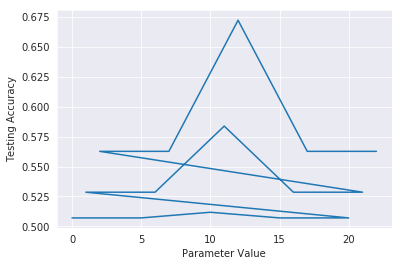

In [57]:
# Visualize the above accuracy tests, with the peak at test 13, which corresponds to C = 0.001 and solver = liblinear

lr_prob = lr_model.predict_proba(X_test)
log_loss(y_test, lr_prob)
plt.plot(index, accuracy_score)
plt.xlabel('Parameter Value')
plt.ylabel('Testing Accuracy')

In [58]:
# Set logistic regression with optimal regularization of C = 0.001 and solver = 'liblinear'
lr_model = LogisticRegression(C = 0.001, solver = 'liblinear')

In [59]:
# Train logistic regression model
lr_model.fit(X_train, y_train)
lr_model

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
# Make prediction on test set using our model
y_hat_lr = lr_model.predict(X_test)

In [61]:
# Determine probabilities of loan classification using our test set. We'll need this for our logloss score. 
y_hat_lr_prob = lr_model.predict_proba(X_test)

#### Evaluating Logistic Regression Performance

Let's calculate the confusion matrix to evaluate model performance.

In [62]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_hat_lr,labels=["PAIDOFF","COLLECTION"]) 
print(cm)

[[45  7]
 [14  4]]


We can plot a heatmap to make it easier to visualize and interpret:

Top left is true negative (TN)
<br>Top right is false positive (FP)
<br>Bottom left is false negative (FN)
<br>Bottom right is true postivie (TP)

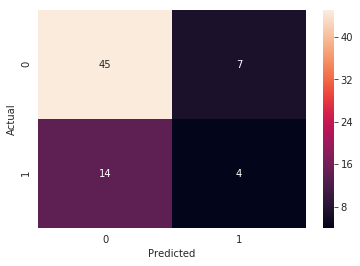

In [63]:
# Plot heatmap of confusion matrix
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Let's generate our confustion matrix report to evaluate model performance. Remember that:

Precision is the ratio of true postives to all positive predicted by model, Precision = TP / (TP + FP).

Recall is the ratio of true positives to all positives actually in our data set, Recall = TP / (TP + FN).

F1-score is the harmonic mean of preiciaion and recall. 

In [64]:
# Confusion matrix report
np.set_printoptions(precision=2)
print (classification_report(y_test, y_hat_lr))

              precision    recall  f1-score   support

  COLLECTION       0.36      0.22      0.28        18
     PAIDOFF       0.76      0.87      0.81        52

   micro avg       0.70      0.70      0.70        70
   macro avg       0.56      0.54      0.54        70
weighted avg       0.66      0.70      0.67        70



We can also calculate jaccard similarity score, f1-score, and log loss automaically using the jaccard_similarity_score, f1_score, and log_loss functions, respectively. Jaccard score is the intersection divided by the union of the two labeled sets (the test and fitted set). F1-score is the harmonic mean of preiciaion and recall as we saw above.

In [65]:
# Jaccard similarity score for logistic regression
jaccard_lr = jaccard_similarity_score(y_test, y_hat_lr)
jaccard_lr

0.7

In [66]:
# F1 score for logistic regression
f1_lr = f1_score(y_test, y_hat_lr, average='weighted')
f1_lr

0.6732525629077353

In [67]:
# Logloss for logistic regression
logloss_lr = log_loss(y_test, y_hat_lr_prob)
logloss_lr

0.6723416199429343

## Part 10: Evaluating Model Performance Head-to-Head

Let's compare KNN, decision tree, SVM, and logistic regression head-to-head using our specified parameters for classifying loan status for this data set. Creating a data frame with our evaluation metrics, we see that KNN performs best while logistic regression is the weakest of the four. 

In [68]:
# Create dataframe with evaluation metrics
evaluation = {"Jaccard":[jaccard_knn, jaccard_tree, jaccard_svm, jaccard_lr], 
             "F1-score":[f1_knn, f1_tree, f1_svm, f1_lr],
             "Log Loss":["NA", "NA", "NA", logloss_lr] 
             }
eval_df = pd.DataFrame(evaluation, columns=["Jaccard", "F1-score", "Log Loss"], index=["KNN", "Decision Tree", "SVM", "Logistic Regression"])
eval_df.columns.name = "Algorithm"
eval_df

Algorithm,Jaccard,F1-score,Log Loss
KNN,0.757143,0.726338,NA
Decision Tree,0.742857,0.704685,NA
SVM,0.757143,0.685714,NA
Logistic Regression,0.700000,0.673253,0.672342
